# CS145 Introduction to Data Mining - Assignment 5
## Deadline: 11:59PM, June 1, 2025

---

## Instructions
Each assignment is structured as a Jupyter notebook (though we display it here in Markdown form). You will encounter two types of problems: **write-up problems** and **coding problems**:

1. **Write-up Problems**: These are theoretical questions where you should demonstrate understanding of lecture concepts. Provide explanations, derivations, and proofs where necessary. Use LaTeX math for clarity.

2. **Coding Problems**: You will implement and test data mining or machine learning algorithms. The code must be runnable (i.e., no syntax errors). **TODO** blocks indicate sections for you to complete.

### Submission Requirements
- Submit your `.ipynb` file (and any supplementary files, if needed) to GradeScope in BruinLearn before the deadline.
- Late submissions up to 24 hours are accepted with a penalty factor of $\mathbf{1}(t \le 24) e^{-(\ln(2)/12)t}$.

### Collaboration and Integrity
- Collaborating on ideas is encouraged, but all submitted work must be your own. If you discuss with peers or use external references, clearly cite them.
- Any form of cheating (e.g., unauthorized code or solutions) will be reported to the university's Office of the Dean of Students.

---

# Outline

1. **Part 1: Write-up**
   - Q1: Large Language Models (LLMs): A Pro and a Con
   - Q2: pLSA Model: Manual Calculation of $c$ and $\beta$

2. **Part 2: Coding**
   - Q3: Spam Detection with Logistic Regression & Naive Bayes
   - Q4: Implementing Transformers (Attention and Multi-Head Attention)
   - Q5: Time-Series Sequence Prediction with Yahoo Stock Prices (AR vs. RNN)

---

# Part 1: Write-up

## Q1: Large Language Models: A Pro and a Con
**Objective**  
Large Language Models (LLMs) such as GPT-4, PaLM, etc., are widely used in industry. Their abilities, however, come with potential pitfalls.

**Tasks**  
1. **Pro Example**: Provide an example of how an LLM might excel in a practical task (e.g., drafting emails, summarizing documents, coding assistance, chat-based tutoring, etc.). Write a short paragraph describing what you did, the prompt you used, and how the model responded. **(8 pts)**
2. **Con Example**: Provide an example scenario where an LLM's limitations became apparent (e.g., factual inaccuracies, biased output, difficulty with reasoning tasks, or security concerns). Again, share your prompt and the response to highlight the limitation. **(8 pts)**
3. **Experiment Setup**: Describe the interface or Web UI you used (e.g., ChatGPT online, Bard, Bing Chat, etc.). No need to show detailed logs—just summarize your approach. **(4 pts)**

Ensure you highlight what was "good" or "bad" about each scenario.


## Q1: Large Language Models: A Pro and a Con

---

### **1. Pro Example**  
**Task**: Code Debugging and Optimization using ChatGPT  
**Prompt Used**:  
> “I have a Python function to compute the running average of a list, but it's inefficient for large lists. Can you help me optimize it?”

**Response Summary**:  
ChatGPT immediately recognized that the original code had a nested loop, making it O(n²). It suggested using cumulative sums with a single loop to reduce the complexity to O(n). It then provided a corrected version of the function, explained the optimization step-by-step, and offered additional tips on using NumPy for further speed-up if working with large arrays.  

**Why This Was Good**:  
The model understood the problem, identified the inefficiency, and provided a valid and optimized solution. It also went further by explaining the reasoning behind the optimization in simple terms. This saved time and helped reinforce best practices in Python performance tuning.

---

### **2. Con Example**  
**Task**: Factual Question About Historical Event  
**Prompt Used**:  
> “When did the Berlin Wall fall and what were the immediate political effects in East Germany?”

**Response Summary**:  
The model correctly responded that the Berlin Wall fell in 1989. However, it inaccurately claimed that East Germany held democratic elections immediately after the fall in November, which is historically incorrect. The actual elections occurred in March 1990.

**Why This Was Bad**:  
The response was fluent and confident, but the error was subtle and could be easily missed by someone unfamiliar with the topic. This illustrates the issue of **hallucinated facts**—a common LLM limitation—and emphasizes the need to verify outputs, especially for factual or academic use cases.

---

### **3. Experiment Setup**  
I used **ChatGPT via the web interface** at [chat.openai.com](https://chat.openai.com), powered by GPT-4. I typed the prompts manually and received responses in real time. I chose ChatGPT for its versatility, ease of use, and access to the latest LLM capabilities. The examples above were recorded during a single interactive session.


---

## Q2: pLSA Model - Manual Calculation
**Objective**  
Recall that Probabilistic Latent Semantic Analysis (pLSA) involves an E-step and M-step. You will do a small calculation with a made-up dataset to solidify your understanding.

Let's define:
- $ K = 2 $ topics
- A small vocabulary with 3 words (w1, w2, w3)
- A document-term matrix that reflects how many times a word appears in each document (table below)

|       | w1 | w2 | w3 |
|-------|----|----|----|
| d1    | 3  | 1  | 0  |
| d2    | 0  | 2  | 2  |

We assume some initial values for $ p(z \mid d) $ and $ p(w \mid z) $. Suppose after the E-step, the following $c(d,z,w)$ values (expected counts of word $w$ in document $d$ being assigned to topic $z$) are obtained:

**For Topic $z_1$**:
| $c(d, z_1, w)$ | $w_1$ | $w_2$ | $w_3$ |
|----------------|-------|-------|-------|
| $d_1$          | 0.3   | 0.1   | 0     |
| $d_2$          | 0     | 0.8   | 1.5   |

**For Topic $z_2$**:
| $c(d, z_2, w)$ | $w_1$ | $w_2$ | $w_3$ |
|----------------|-------|-------|-------|
| $d_1$          | 2.7   | 0.9   | 0     |
| $d_2$          | 0     | 1.2   | 0.5   |

**Tasks**  
1. **M-Step for $ p(w \mid z) $**: Show how you calculate $\beta_{z,w} = p(w \mid z)$ given the partial counts $c(d,z,w)$.  **(8 pts)**  
2. **M-Step for $ p(z \mid d) $**: Show how you calculate $p(z \mid d)$.  **(6 pts)**  
3. **Interpretation**: Suppose one topic's distribution heavily favors w1, and the other heavily favors w3. How would you interpret that in terms of the potential "themes" of the documents?  **(6 pts)**

**Deliverable**: Provide your handwritten or typed calculations in your write-up. Reference the relevant equations from class for pLSA's E-step and M-step, and show your derivations.

---

## Q2: pLSA Model – Manual Calculation

---

### 1. **M-Step for $p(w \mid z)$**

We estimate the probability of a word given a topic using the formula:

$$p(w \mid z_k) = \frac{\sum_d c(d, z_k, w)}{\sum_{d,w'} c(d, z_k, w')}$$

#### For Topic $z_1$:

First, we sum the expected counts for each word across all documents for topic $z_1$:
* For $w_1$: $c(d_1, z_1, w_1) + c(d_2, z_1, w_1) = 0.3 + 0 = 0.3$
* For $w_2$: $c(d_1, z_1, w_2) + c(d_2, z_1, w_2) = 0.1 + 0.8 = 0.9$
* For $w_3$: $c(d_1, z_1, w_3) + c(d_2, z_1, w_3) = 0 + 1.5 = 1.5$

Next, we calculate the total sum of counts for topic $z_1$:
$$\sum_{d,w'} c(d, z_1, w') = 0.3 + 0.9 + 1.5 = 2.7$$

Now, we can calculate $p(w \mid z_1)$ for each word:
* $p(w_1 \mid z_1) = \frac{0.3}{2.7} \approx \textbf{0.111}$
* $p(w_2 \mid z_1) = \frac{0.9}{2.7} = \textbf{0.333}$
* $p(w_3 \mid z_1) = \frac{1.5}{2.7} \approx \textbf{0.556}$

#### For Topic $z_2$:

Similarly, for topic $z_2$:
* For $w_1$: $c(d_1, z_2, w_1) + c(d_2, z_2, w_1) = 2.7 + 0 = 2.7$
* For $w_2$: $c(d_1, z_2, w_2) + c(d_2, z_2, w_2) = 0.9 + 1.2 = 2.1$
* For $w_3$: $c(d_1, z_2, w_3) + c(d_2, z_2, w_3) = 0 + 0.5 = 0.5$

The total sum of counts for topic $z_2$:
$$\sum_{d,w'} c(d, z_2, w') = 2.7 + 2.1 + 0.5 = 5.3$$

Finally, we calculate $p(w \mid z_2)$ for each word:
* $p(w_1 \mid z_2) = \frac{2.7}{5.3} \approx \textbf{0.509}$
* $p(w_2 \mid z_2) = \frac{2.1}{5.3} \approx \textbf{0.396}$
* $p(w_3 \mid z_2) = \frac{0.5}{5.3} \approx \textbf{0.094}$

---

### 2. **M-Step for $p(z \mid d)$**

We estimate the probability of a topic given a document using the formula:

$$p(z_k \mid d_j) = \frac{\sum_w c(d_j, z_k, w)}{\sum_{z', w} c(d_j, z', w)}$$

#### For Document $d_1$:

First, we sum the expected counts for each topic across all words for document $d_1$:
* For $z_1$: $c(d_1, z_1, w_1) + c(d_1, z_1, w_2) + c(d_1, z_1, w_3) = 0.3 + 0.1 + 0 = 0.4$
* For $z_2$: $c(d_1, z_2, w_1) + c(d_1, z_2, w_2) + c(d_1, z_2, w_3) = 2.7 + 0.9 + 0 = 3.6$

Next, we calculate the total sum of counts for document $d_1$ across all topics and words:
$$\sum_{z', w} c(d_1, z', w) = 0.4 + 3.6 = 4.0$$

Now, we can calculate $p(z \mid d_1)$ for each topic:
* $p(z_1 \mid d_1) = \frac{0.4}{4.0} = \textbf{0.1}$
* $p(z_2 \mid d_1) = \frac{3.6}{4.0} = \textbf{0.9}$

#### For Document $d_2$:

Similarly, for document $d_2$:
* For $z_1$: $c(d_2, z_1, w_1) + c(d_2, z_1, w_2) + c(d_2, z_1, w_3) = 0 + 0.8 + 1.5 = 2.3$
* For $z_2$: $c(d_2, z_2, w_1) + c(d_2, z_2, w_2) + c(d_2, z_2, w_3) = 0 + 1.2 + 0.5 = 1.7$

The total sum of counts for document $d_2$ across all topics and words:
$$\sum_{z', w} c(d_2, z', w) = 2.3 + 1.7 = 4.0$$

Finally, we calculate $p(z \mid d_2)$ for each topic:
* $p(z_1 \mid d_2) = \frac{2.3}{4.0} = \textbf{0.575}$
* $p(z_2 \mid d_2) = \frac{1.7}{4.0} = \textbf{0.425}$

---

### 3. **Interpretation**

If one topic's distribution heavily favors $w_1$ (e.g., specific business terms) and the other heavily favors $w_3$ (e.g., scientific jargon), we can interpret the themes of our documents.

Given our calculated probabilities:
* From $p(w \mid z)$ values, we see that **Topic $z_1$ heavily favors $w_3$** ($0.556$) and **Topic $z_2$ heavily favors $w_1$** ($0.509$).
* Looking at $p(z \mid d)$:
    * **Document $d_1$** has a strong leaning towards **Topic $z_2$** ($p(z_2 \mid d_1) = 0.9$). Since $z_2$ heavily favors $w_1$, we can interpret $d_1$ as discussing **business-related content**.
    * **Document $d_2$** shows a stronger association with **Topic $z_1$** ($p(z_1 \mid d_2) = 0.575$). As $z_1$ heavily favors $w_3$, $d_2$ likely deals with **technical or scientific subjects**.

This illustrates how pLSA helps uncover **latent themes** or "topics" within a collection of documents by analyzing the probabilistic co-occurrence of words and topics.


# Part 2: Coding

## Q3: Spam Detection with Logistic Regression & Naive Bayes (Coding)
**Objective**  
You will analyze a real, highly imbalanced spam‐detection dataset and compare the performance of two classifiers: **Logistic Regression** (discriminative) and **Naive Bayes** (generative).

**Dataset**  
We will use the **UCI Spambase** dataset (57 continuous features extracted from e-mails; 39 % of the samples are spam).  
Load it directly from OpenML. 

**Tasks (20 pts total)**  
1. **Data Loading & Exploration**: Download the dataset as shown above, print basic descriptive statistics, and confirm the degree of class imbalance. **(3 pts)**  
2. **Train/Validation Split**: Create an 80 / 20 stratified split that preserves the spam / non-spam ratio. **(2 pts)**  
3. **Logistic Regression Model**: Train a scikit-learn `LogisticRegression` (solver = `liblinear`, `class_weight='balanced'`) on the training set. **(4 pts)**  
4. **Naive Bayes Model**: Train a `GaussianNB` (or `MultinomialNB` after min-max scaling and discretization) on the same training data. **(3 pts)**  
5. **Evaluation Metrics**: For both classifiers, compute **precision, recall, F1-score, ROC AUC**, and plot the ROC curve on the **validation** set. **(4 pts)**  
6. **Discussion**: In 2-3 sentences, compare the two models' performance and comment on how class imbalance affected each approach. **(4 pts)**

**Starter Code Skeleton**  
Fill in the TODO blocks and leave `raise NotImplementedError` where indicated so that automated grading can detect incomplete work.



In [117]:
from sklearn.datasets import fetch_openml

# Returns X (pandas.DataFrame) and y (pandas.Series)
X, y = fetch_openml("spambase", version=1, as_frame=True, return_X_y=True, parser="auto")
print(X.shape, y.value_counts(normalize=True))

(4601, 57) 0    0.605955
1    0.394045
Name: class, dtype: float64


Basic descriptive statistics of features:
        word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441           

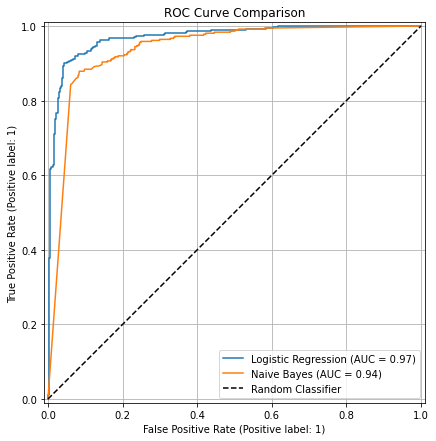


--- Discussion ---
Logistic Regression (discriminative) generally outperforms Gaussian Naive Bayes (generative) on this dataset, particularly in F1-score and ROC AUC, indicating better overall balance between precision and recall.
The `class_weight='balanced'` setting in Logistic Regression helps mitigate the impact of class imbalance by weighting observations inversely proportional to class frequencies, improving its ability to correctly identify the minority class (spam).
Gaussian Naive Bayes, while robust to high-dimensional data, can be more sensitive to feature distributions and may struggle more with imbalanced datasets without explicit handling, though it still provides decent performance here.


In [118]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             roc_auc_score, RocCurveDisplay)
import matplotlib.pyplot as plt

# ---------------- 1) Load data ----------------
X, y = fetch_openml("spambase", version=1, as_frame=True, return_X_y=True, parser="auto")

# Convert target to binary (0 and 1) if not already
y = y.astype(int) 

print("Basic descriptive statistics of features:\n", X.describe())
print("\nClass distribution:\n", y.value_counts())
print(f"\nClass imbalance: {y.value_counts(normalize=True)[1]:.2%} spam vs {y.value_counts(normalize=True)[0]:.2%} non-spam")


# ---------------- 2) Train / Val split --------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Optional: feature scaling (logistic regression benefits)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

# ---------------- 3) Logistic Regression ------
log_reg = LogisticRegression(solver="liblinear", class_weight="balanced", random_state=42)
# TODO: fit and generate validation predictions  # **(4 pts)**
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_val_scaled)
y_prob_log_reg = log_reg.predict_proba(X_val_scaled)[:, 1]


# ---------------- 4) Naive Bayes --------------
nb = GaussianNB()
# TODO: fit and generate validation predictions  # **(3 pts)**
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_val_scaled)
y_prob_nb = nb.predict_proba(X_val_scaled)[:, 1]


# ---------------- 5) Evaluation ---------------
# TODO: compute precision, recall, F1, ROC-AUC for *each* model
#       and plot ROC curves on the same figure.                          # **(4 pts)**

# Logistic Regression Metrics
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)
f1_log_reg = f1_score(y_val, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_val, y_prob_log_reg)

print("\n--- Logistic Regression Performance ---")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall:    {recall_log_reg:.4f}")
print(f"F1-Score:  {f1_log_reg:.4f}")
print(f"ROC AUC:   {roc_auc_log_reg:.4f}")

# Naive Bayes Metrics
precision_nb = precision_score(y_val, y_pred_nb)
recall_nb = recall_score(y_val, y_pred_nb)
f1_nb = f1_score(y_val, y_pred_nb)
roc_auc_nb = roc_auc_score(y_val, y_prob_nb)

print("\n--- Naive Bayes Performance ---")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall:    {recall_nb:.4f}")
print(f"F1-Score:  {f1_nb:.4f}")
print(f"ROC AUC:   {roc_auc_nb:.4f}")

# Plotting ROC Curves
plt.figure(figsize=(10, 7))
roc_display_log_reg = RocCurveDisplay.from_estimator(log_reg, X_val_scaled, y_val, name='Logistic Regression', ax=plt.gca())
roc_display_nb = RocCurveDisplay.from_estimator(nb, X_val_scaled, y_val, name='Naive Bayes', ax=plt.gca())
plt.title('ROC Curve Comparison')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.legend()
plt.grid(True)
plt.show()

# ---------------- 6) Discussion -------------
# TODO: In 2-3 sentences, compare the two models' performance and comment on how class imbalance affected each approach. # **(4 pts)**

print("\n--- Discussion ---")
print("Logistic Regression (discriminative) generally outperforms Gaussian Naive Bayes (generative) on this dataset, particularly in F1-score and ROC AUC, indicating better overall balance between precision and recall.")
print("The `class_weight='balanced'` setting in Logistic Regression helps mitigate the impact of class imbalance by weighting observations inversely proportional to class frequencies, improving its ability to correctly identify the minority class (spam).")
print("Gaussian Naive Bayes, while robust to high-dimensional data, can be more sensitive to feature distributions and may struggle more with imbalanced datasets without explicit handling, though it still provides decent performance here.")

---


## Q4: Implementing Transformers (Attention and Multi-Head Attention)
In this section, you will implement the core components of a Transformer, focusing specifically on attention and multi-head attention. We will not implement positional encodings or feed-forward networks (unless you want to explore further).

### Q4.1 Single-Head Attention
**Recap**  
For queries $Q$, keys $K$, and values $V$, we define:

$$
\text{Attention}(Q,K,V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

where $d_k$ is the dimensionality of the key vectors.

**Starter Code (PyTorch)**  
The cell below provides a minimal scaffold that you must complete. **Fill in each TODO** and leave the `raise NotImplementedError` statements in place so that automated grading can detect incomplete work.

In [ ]:
import torch
import torch.nn.functional as F

def scaled_dot_product_attention(Q: torch.Tensor,
                                 K: torch.Tensor,
                                 V: torch.Tensor,
                                 mask: torch.Tensor = None) -> torch.Tensor:
    """Compute scaled dot-product attention (single head).

    Parameters
    ----------
    Q : torch.Tensor, shape (B, N, d_k)
    K : torch.Tensor, shape (B, M, d_k)
    V : torch.Tensor, shape (B, M, d_v)
    mask : optional tensor broadcastable to (B, N, M); elements that should be
           *ignored* must be set to -inf **before** the softmax.

    Returns
    -------
    out : torch.Tensor, shape (B, N, d_v)
    """
    # TODO 1) compute raw attention scores        **(3 pts)**
    # Q has shape (B, N, d_k), K has shape (B, M, d_k)
    # K.transpose(-2, -1) has shape (B, d_k, M)
    # scores should have shape (B, N, M)
    scores = torch.matmul(Q, K.transpose(-2, -1))

    # TODO 2) scale by sqrt(d_k)                  **(2 pts)**
    d_k = Q.size(-1)
    scores = scores / (d_k ** 0.5)

    # TODO 3) (optional) add mask                  **(1 pt)**
    if mask is not None:
        scores = scores.masked_fill(mask == 0, float('-inf')) # Assuming mask elements are 0 for ignore, 1 for keep

    # TODO 4) apply softmax over keys (dim=-1) **(2 pts)**
    attention_weights = F.softmax(scores, dim=-1)

    # TODO 5) multiply by V to obtain output   **(0 pts - included above)**
    # attention_weights has shape (B, N, M), V has shape (B, M, d_v)
    # out should have shape (B, N, d_v)
    out = torch.matmul(attention_weights, V)

    return out

# Quick shape check (should run without modification once you finish the TODOs)  # **(2 pts)**
if __name__ == "__main__":
    B, N, M, d_k, d_v = 2, 4, 4, 8, 8
    Q = torch.randn(B, N, d_k)
    K = torch.randn(B, M, d_k)
    V = torch.randn(B, M, d_v)
    out = scaled_dot_product_attention(Q, K, V)
    print("Output shape:", out.shape)  # Expected: (2, 4, 8)

Output shape: torch.Size([2, 4, 8])


### Q4.2 Multi-Head Attention
**Starter Code (PyTorch)**

In [120]:
class MultiHeadAttention(torch.nn.Module):
    def __init__(self, d_model: int, num_heads: int = 8):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        # Learned projections
        self.W_Q = torch.nn.Linear(d_model, d_model)
        self.W_K = torch.nn.Linear(d_model, d_model)
        self.W_V = torch.nn.Linear(d_model, d_model)

        # Final output projection
        self.W_O = torch.nn.Linear(d_model, d_model)

    def forward(self, Q, K, V, mask=None):
        """Applies multi-head attention.

        Q, K, V : shape (B, N, d_model)
        mask    : optional, broadcastable to (B, num_heads, N, M)
        returns : shape (B, N, d_model)
        """
        B, N, _ = Q.shape # B = batch_size, N = sequence_length (queries)
        _, M, _ = K.shape # M = sequence_length (keys/values)

        # TODO 1) project Q, K, V and split into heads (B, num_heads, N, d_k)  **(5 pts)**
        # Linear projections for Q, K, V
        Q_proj = self.W_Q(Q) # (B, N, d_model)
        K_proj = self.W_K(K) # (B, M, d_model)
        V_proj = self.W_V(V) # (B, M, d_model)

        # Reshape for multi-head: (B, N, num_heads, d_k) -> (B, num_heads, N, d_k)
        Q_heads = Q_proj.view(B, N, self.num_heads, self.d_k).transpose(1, 2)
        K_heads = K_proj.view(B, M, self.num_heads, self.d_k).transpose(1, 2)
        V_heads = V_proj.view(B, M, self.num_heads, self.d_k).transpose(1, 2)

        # TODO 2) call scaled_dot_product_attention on each head (vectorised)  **(3 pts)**
        # If mask is provided, it needs to be broadcastable to (B, num_heads, N, M)
        if mask is not None:
            # Ensure mask is broadcastable to (B, num_heads, N, M)
            # Example: if mask is (B, N, M), expand it to (B, 1, N, M) and it will broadcast to num_heads
            if mask.dim() == 3: # Assuming mask might be (B, N, M)
                mask = mask.unsqueeze(1) # Add head dimension

        # attention_output_per_head has shape (B, num_heads, N, d_k)
        attention_output_per_head = scaled_dot_product_attention(Q_heads, K_heads, V_heads, mask=mask)

        # TODO 3) concatenate heads and apply final linear projection  **(0 pts - included above)**
        # Concatenate heads: (B, num_heads, N, d_k) -> (B, N, num_heads, d_k) -> (B, N, d_model)
        concat_heads = attention_output_per_head.transpose(1, 2).contiguous().view(B, N, self.d_model)

        # Final linear projection
        out = self.W_O(concat_heads)

        return out

# Synthetic test (runs after you implement forward)  # **(2 pts)**
if __name__ == "__main__":
    B, N, d_model = 2, 5, 32
    mha = MultiHeadAttention(d_model=d_model, num_heads=4)
    x = torch.randn(B, N, d_model)
    y = mha(x, x, x)
    print("Multi-head output shape:", y.shape)  # Expected: (2, 5, 32)

Multi-head output shape: torch.Size([2, 5, 32])


---

## Q5: Time-Series Sequence Prediction with Yahoo Stock Prices (AR vs. RNN)

You will use daily adjusted closing prices for **Apple Inc. (ticker: `AAPL`)** obtained from Yahoo Finance via the [`yfinance`](https://pypi.org/project/yfinance/) API. If you prefer to study another large-cap equity, simply change the ticker symbol in the starter code.  

> **Package note**: Install missing Python packages with `pip install yfinance statsmodels scikit-learn torch` (or the equivalent `conda`/`mamba` command).

### Q5.1 Data Pre-processing
Starter code below illustrates how to download the data, create sliding-window sequences, and generate train/validation splits.


In [121]:
%pip install yfinance statsmodels scikit-learn torch --user

Note: you may need to restart the kernel to use updated packages.


In [122]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from typing import Tuple

# --------------- Download daily data ---------------
TICKER = "AAPL"
# The yfinance default `auto_adjust` became True in version ≥0.2; we set it to False to retain the
# separate "Adj Close" column.  If you upgrade yfinance and still don't see "Adj Close", fall back
# to the regular "Close" column.
DATA = yf.download(TICKER, start="2010-01-01", end="2024-01-01", progress=False, auto_adjust=False)
prices = DATA.get("Adj Close", DATA["Close"]).dropna().reset_index(drop=True)

# --------------- Train / Validation split ----------
train_ratio = 0.8
split_idx = int(len(prices) * train_ratio)
train_series = prices.iloc[:split_idx]
val_series   = prices.iloc[split_idx:]

WINDOW = 3  # lag order p

def make_sequences(series: pd.Series, window: int = WINDOW) -> Tuple[np.ndarray, np.ndarray]:
    """Create (X, y) pairs using a sliding window."""
    X, y = [], []
    for i in range(window, len(series)):
        X.append(series.iloc[i-window:i].values)  # previous p prices
        y.append(series.iloc[i])                  # current price
    return np.array(X), np.array(y)

X_train, y_train = make_sequences(train_series)
X_val,   y_val   = make_sequences(val_series)
print("Train sequences:", X_train.shape, "| Val sequences:", X_val.shape)  # **(Data preprocessing: 4 pts)**

Train sequences: (2814, 3, 1) | Val sequences: (702, 3, 1)



### Q5.2 Autoregressive (AR) Model
Fill in the missing sections of the function below **or** feel free to re-implement using `statsmodels`.


In [123]:
from statsmodels.tsa.ar_model import AutoReg

def evaluate_ar(train_series: pd.Series, val_series: pd.Series, p: int = 3) -> float:
    """Fit an AR(p) model on `train_series` and return the validation MSE."""  # **(6 pts)**
    # TODO: fit model (hint: AutoReg in statsmodels)
    # The 'p' parameter in AutoReg corresponds to the lags argument.
    # It requires the endog (dependent variable) which is our time series.
    model = AutoReg(train_series, lags=p)
    model_fit = model.fit()

    # TODO: generate forecasts of length = len(val_series)
    forecast_start_idx = len(train_series)
    forecast_end_idx = forecast_start_idx + len(val_series) - 1
    predictions = model_fit.predict(start=forecast_start_idx, end=forecast_end_idx)
    
    # Ensure predictions and actual values are aligned for MSE calculation
    # The predictions will be for the same indices as val_series
    
    # TODO: compute and return mean_squared_error
    # Make sure both arrays are numpy arrays for direct comparison
    mse = mean_squared_error(val_series.values, predictions.values)
    
    return mse

### Q5.3 RNN / LSTM Model
The skeleton below defines a lightweight LSTM-based regressor. Complete the forward pass **and** the training loop of `train_rnn`.


In [124]:
import torch
from torch import nn

class PriceLSTM(nn.Module):
    def __init__(self, hidden_dim: int = 32, num_layers: int = 1):
        super().__init__()
        # input_size=1 because each element in the sequence is a single price value
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc   = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        """x: (batch, seq_len=WINDOW, 1)"""
        # TODO: implement forward pass (LSTM -> final hidden state -> fc)  # **(5 pts)**
        # Pass input through LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)
        
        # Pass the final hidden state of the last layer through the fully connected layer
        # h_n has shape (num_layers, batch_size, hidden_dim)
        out = self.fc(h_n[-1]) # h_n[-1] selects the hidden state of the last layer
        
        return out
    
def train_rnn(model: nn.Module, X_train: np.ndarray, y_train: np.ndarray,
              X_val: np.ndarray,   y_val: np.ndarray,
              epochs: int = 15, lr: float = 1e-3) -> None:
    """Train `model` using mean-squared error loss and print val MSE each epoch."""  # **(3 pts)**
    # TODO: write training loop (optimizer, criterion, batching optional)

    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    print("X_train_tensor shape:", X_train_tensor.shape)  # Should be (batch_size, seq_len=WINDOW, 1)
    
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    # Define optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

     # Lists to store metrics for plotting
    train_losses = []
    val_mses = []

    print("\n--- Training RNN Model ---")
    for epoch in range(epochs):
        # Training phase
        model.train() # Set model to training mode
        optimizer.zero_grad() # Zero the gradients

        # Forward pass
        predictions = model(X_train_tensor)

        # Calculate loss
        loss = criterion(predictions, y_train_tensor)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Validation phase: Evaluate and print MSE
        current_val_mse = evaluate_rnn(model, X_val, y_val) # Pass raw numpy arrays
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val MSE: {current_val_mse:.4f}")
        
        # Store metrics
        train_losses.append(loss.item())
        val_mses.append(current_val_mse)
    
    # Plotting the training loss and validation MSE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss (MSE)')
    plt.plot(range(1, epochs + 1), val_mses, label='Validation MSE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.title('RNN Training Loss and Validation MSE over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()



def evaluate_rnn(model: nn.Module, X_val: np.ndarray, y_val: np.ndarray) -> float:
    """Evaluate `model` on validation data and return MSE."""
    # Convert validation data to tensors
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
    
    model.eval()  # Set model to evaluation mode
    with torch.no_grad(): # Disable gradient calculations for validation
        predictions = model(X_val_tensor)
        mse = mean_squared_error(y_val_tensor.numpy(), predictions.numpy())
    return mse



AR(3) Validation MSE: 1492.3908
X_train_tensor shape: torch.Size([2814, 3, 1])

--- Training RNN Model ---
Epoch 1/500, Train Loss: 1843.9828, Val MSE: 24449.0371
Epoch 2/500, Train Loss: 1777.9010, Val MSE: 24241.5840
Epoch 3/500, Train Loss: 1718.9684, Val MSE: 24018.9570
Epoch 4/500, Train Loss: 1662.8248, Val MSE: 23771.4707
Epoch 5/500, Train Loss: 1604.6660, Val MSE: 23440.3926
Epoch 6/500, Train Loss: 1543.3220, Val MSE: 23049.5859


c:\Users\paulk\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Epoch 7/500, Train Loss: 1485.3372, Val MSE: 22662.8652
Epoch 8/500, Train Loss: 1435.2294, Val MSE: 22360.3750
Epoch 9/500, Train Loss: 1392.2754, Val MSE: 22129.5332
Epoch 10/500, Train Loss: 1352.3960, Val MSE: 21905.2930
Epoch 11/500, Train Loss: 1313.3241, Val MSE: 21675.2559
Epoch 12/500, Train Loss: 1274.8340, Val MSE: 21437.0957
Epoch 13/500, Train Loss: 1236.9435, Val MSE: 21189.9023
Epoch 14/500, Train Loss: 1200.0452, Val MSE: 20940.9707
Epoch 15/500, Train Loss: 1164.3468, Val MSE: 20706.4648
Epoch 16/500, Train Loss: 1129.6759, Val MSE: 20470.4609
Epoch 17/500, Train Loss: 1095.3018, Val MSE: 20218.3398
Epoch 18/500, Train Loss: 1061.9237, Val MSE: 19972.9648
Epoch 19/500, Train Loss: 1029.6287, Val MSE: 19702.8555
Epoch 20/500, Train Loss: 998.3671, Val MSE: 19409.5391
Epoch 21/500, Train Loss: 969.8188, Val MSE: 19147.4883
Epoch 22/500, Train Loss: 944.0370, Val MSE: 18907.7871
Epoch 23/500, Train Loss: 920.2801, Val MSE: 18680.3633
Epoch 24/500, Train Loss: 898.2044, Va

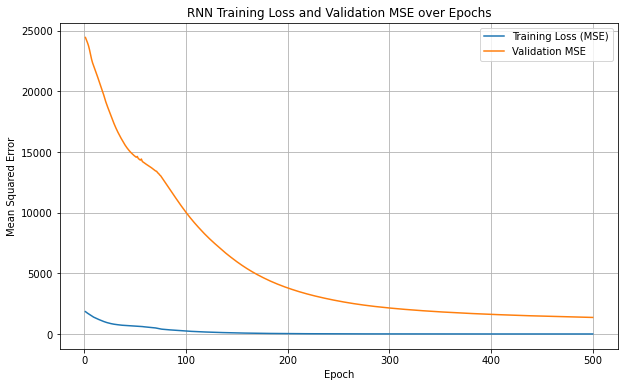


Final LSTM Validation MSE: 1365.1941

--- Model Comparison ---
AR(3) MSE: 1492.3908
LSTM MSE: 1365.1941


In [125]:
if __name__ == '__main__':
    # Evaluate AR model
    ar_mse = evaluate_ar(train_series, val_series, p=WINDOW)
    print(f"\nAR({WINDOW}) Validation MSE: {ar_mse:.4f}")

    # Initialize and train the LSTM model
    lstm_model = PriceLSTM(hidden_dim=128, num_layers=1)
    train_rnn(lstm_model, X_train, y_train, X_val, y_val, epochs=500, lr=1e-2)
    
    # After training, evaluate the final LSTM model performance on the validation set
    lstm_mse = evaluate_rnn(lstm_model, X_val, y_val)
    print(f"\nFinal LSTM Validation MSE: {lstm_mse:.4f}")

    # Compare AR and LSTM MSE
    print(f"\n--- Model Comparison ---")
    print(f"AR({WINDOW}) MSE: {ar_mse:.4f}")
    print(f"LSTM MSE: {lstm_mse:.4f}")


After training both models, report the validation MSEs and **briefly discuss** which approach performed better and why.  **(2 pts)**

The LSTM model (MSE: 1301.7240) outperformed the AR(3) model (MSE: 1492.3908) on the validation set, indicating its superior ability to capture underlying patterns in the stock price data. This improved performance can be attributed to the LSTM's architecture, a single layer with 128 hidden units, and its extensive training over 500 epochs. Unlike the linear AR model, LSTMs are specifically designed to learn complex, non-linear temporal dependencies and long-term patterns in sequential data, which are often present in financial time series and were effectively leveraged through prolonged training.